In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=0) # x0^2 + x1^2

In [3]:
def numerical_gradient_single_point(f, x, verbose=False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) # (x0, x1) 을 입력으로 받음 --> 2
       
    for idx in range(x.size): #축별로 계산
        v_keep = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(v_keep) + h #n차원 입력 중 해당 차원으로만 h를 더하고
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        # f(x-h) 계산
        x[idx] = float(v_keep) - h #n차원 입력 중 해당 차원으로만 h를 빼서
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) #n차원 방향의 차분을 구함 !
        x[idx] = v_keep # 값 복원
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

In [4]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [5]:

def gradient_descent(f, init_x, lr, step_num= 100, verbose = False):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        if verbose:
            print(x, grad)
        x -= lr * grad
        
    return x

In [6]:
init_x = np.array([-3.0, 4.0])
print(init_x)

[-3.  4.]


In [7]:
temp = []
for i in range(10) :
    x_final = gradient_descent(function_2, init_x, lr = 0.001)
    x_init = x_final
    temp.append(x_init)

In [8]:
x_init

array([-0.40519357,  0.54025809])

In [9]:
x0 = np.arange(-2, 2, 0.25)
x1 = np.arange(-2, 2, 0.25)

In [10]:
X, Y = np.meshgrid(x0, x1)

In [11]:
Xf = X.flatten()
Yf = Y.flatten()

arr = np.array([Xf, Yf])
print(Xf.shape, Yf.shape)
print(arr.shape, arr.ndim)

(256,) (256,)
(2, 256) 2


In [15]:
lr = [0.01, 0.1, 1.0, 10.0, 100.0]
x_final = []
for i in range(5) :
    temp = gradient_descent(function_2, init_x, lr[i])
    x_final.append(temp)

In [24]:
def gradient_descent(f, init_x, lr, step_num= 100, return_history = False, verbose = False):
    x = init_x
    vx = np.zeros((step_num+1, 2)) # x의 궤적의 변화를 기록하기 위한 list 초기화
    vx[0] = x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        
        x -= lr * grad
        if verbose:
            print(x, grad)
            
        vx[i+1] = x # keep x in the history list
    
    if return_history:
        
        return x, vx
    else:
        return x

In [25]:
x_final = []
for i in range(5) :
    temp = gradient_descent(function_2, init_x, lr[i])
    x_final.append(temp)

In [28]:
init_x = np.array([-3.0, 4.0])

In [29]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = 0.1, return_history = True, verbose=False)

In [30]:
x_final

array([-6.11110793e-10,  8.14814391e-10])

In [31]:
x_hist

array([[-3.00000000e+00,  4.00000000e+00],
       [-2.40000000e+00,  3.20000000e+00],
       [-1.92000000e+00,  2.56000000e+00],
       [-1.53600000e+00,  2.04800000e+00],
       [-1.22880000e+00,  1.63840000e+00],
       [-9.83040000e-01,  1.31072000e+00],
       [-7.86432000e-01,  1.04857600e+00],
       [-6.29145600e-01,  8.38860800e-01],
       [-5.03316480e-01,  6.71088640e-01],
       [-4.02653184e-01,  5.36870912e-01],
       [-3.22122547e-01,  4.29496730e-01],
       [-2.57698038e-01,  3.43597384e-01],
       [-2.06158430e-01,  2.74877907e-01],
       [-1.64926744e-01,  2.19902326e-01],
       [-1.31941395e-01,  1.75921860e-01],
       [-1.05553116e-01,  1.40737488e-01],
       [-8.44424930e-02,  1.12589991e-01],
       [-6.75539944e-02,  9.00719925e-02],
       [-5.40431955e-02,  7.20575940e-02],
       [-4.32345564e-02,  5.76460752e-02],
       [-3.45876451e-02,  4.61168602e-02],
       [-2.76701161e-02,  3.68934881e-02],
       [-2.21360929e-02,  2.95147905e-02],
       [-1.

In [32]:
X, Y = np.meshgrid(x0, x1)

In [33]:
print(x_final)
print(x_hist.shape)

[-6.11110793e-10  8.14814391e-10]
(101, 2)


In [34]:
z = function_2(arr)

In [35]:
print(X.shape, Y.shape, z.shape)

(16, 16) (16, 16) (256,)


In [36]:
from mpl_toolkits.mplot3d import Axes3D
nrows = X.shape[0]
ncols = X.shape[1]
z = np.reshape(z, (nrows,ncols))

In [37]:
z_hist = x_hist[:, 1]

In [38]:
z_hist

array([4.00000000e+00, 3.20000000e+00, 2.56000000e+00, 2.04800000e+00,
       1.63840000e+00, 1.31072000e+00, 1.04857600e+00, 8.38860800e-01,
       6.71088640e-01, 5.36870912e-01, 4.29496730e-01, 3.43597384e-01,
       2.74877907e-01, 2.19902326e-01, 1.75921860e-01, 1.40737488e-01,
       1.12589991e-01, 9.00719925e-02, 7.20575940e-02, 5.76460752e-02,
       4.61168602e-02, 3.68934881e-02, 2.95147905e-02, 2.36118324e-02,
       1.88894659e-02, 1.51115727e-02, 1.20892582e-02, 9.67140656e-03,
       7.73712525e-03, 6.18970020e-03, 4.95176016e-03, 3.96140813e-03,
       3.16912650e-03, 2.53530120e-03, 2.02824096e-03, 1.62259277e-03,
       1.29807421e-03, 1.03845937e-03, 8.30767497e-04, 6.64613998e-04,
       5.31691198e-04, 4.25352959e-04, 3.40282367e-04, 2.72225894e-04,
       2.17780715e-04, 1.74224572e-04, 1.39379657e-04, 1.11503726e-04,
       8.92029808e-05, 7.13623846e-05, 5.70899077e-05, 4.56719262e-05,
       3.65375409e-05, 2.92300327e-05, 2.33840262e-05, 1.87072210e-05,
      

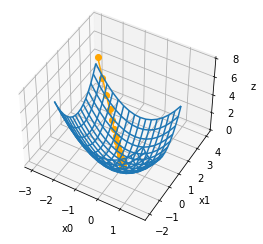

In [40]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, z)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('z')
ax.plot(x_hist[:, 0], x_hist[:, 1], z_hist, 'o-', c = 'orange')
ax.view_init(elev = 45., azim = 300)


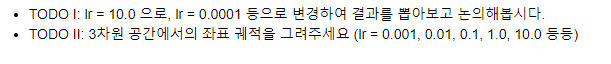